##TASK 6: PREDICTION USING DECISION TREE ALGORITHM
BY: PARIKSHIT JADAV

DATA SCIENCE AND BUSINESS ANALYTICS INTERN AT THE SPARKS FOUNDATION


In [220]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns 

### Loading the dataset

In [221]:
iris=load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

In [222]:
X=iris.data
y=iris.target

### Structure of dataset

In [223]:
print(df.describe())

       sepal length (cm)  sepal width (cm)  ...  petal width (cm)      target
count         150.000000        150.000000  ...        150.000000  150.000000
mean            5.843333          3.057333  ...          1.199333    1.000000
std             0.828066          0.435866  ...          0.762238    0.819232
min             4.300000          2.000000  ...          0.100000    0.000000
25%             5.100000          2.800000  ...          0.300000    0.000000
50%             5.800000          3.000000  ...          1.300000    1.000000
75%             6.400000          3.300000  ...          1.800000    2.000000
max             7.900000          4.400000  ...          2.500000    2.000000

[8 rows x 5 columns]


In [224]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


### Preprocessing the data

In [225]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Using pairplot to check relation of petal and sepal 

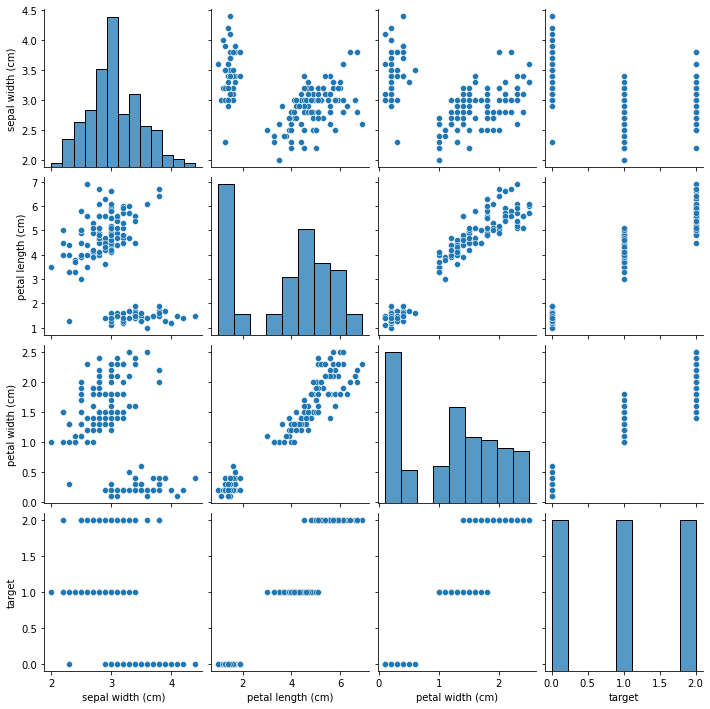

In [226]:
iris = data.iloc[:, 1:]
sns.pairplot(iris)

It can be observed that species Iris-setosa has different attributes from the other 2 species Iris-versicolor and Iris-virginica.

###Splitting the dataset

In [227]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2)

### Fitting the model

In [228]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [229]:
y_pred=clf.predict(X_test)

### Model evaluation

In [230]:
accuracy_scores = cross_val_score(clf, X, y, cv = 3)
accuracy_scores
accuracy_score(y_test,y_pred)

0.8666666666666667

###Plotting Decision Tree

[Text(372.0, 489.24, 'X[3] <= 0.7\ngini = 0.665\nsamples = 120\nvalue = [40, 37, 43]'),
 Text(186.0, 380.52000000000004, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(558.0, 380.52000000000004, 'X[2] <= 4.75\ngini = 0.497\nsamples = 80\nvalue = [0, 37, 43]'),
 Text(372.0, 271.8, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(744.0, 271.8, 'X[3] <= 1.55\ngini = 0.085\nsamples = 45\nvalue = [0, 2, 43]'),
 Text(558.0, 163.08000000000004, 'X[2] <= 4.95\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(372.0, 54.360000000000014, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(744.0, 54.360000000000014, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(930.0, 163.08000000000004, 'gini = 0.0\nsamples = 40\nvalue = [0, 0, 40]')]

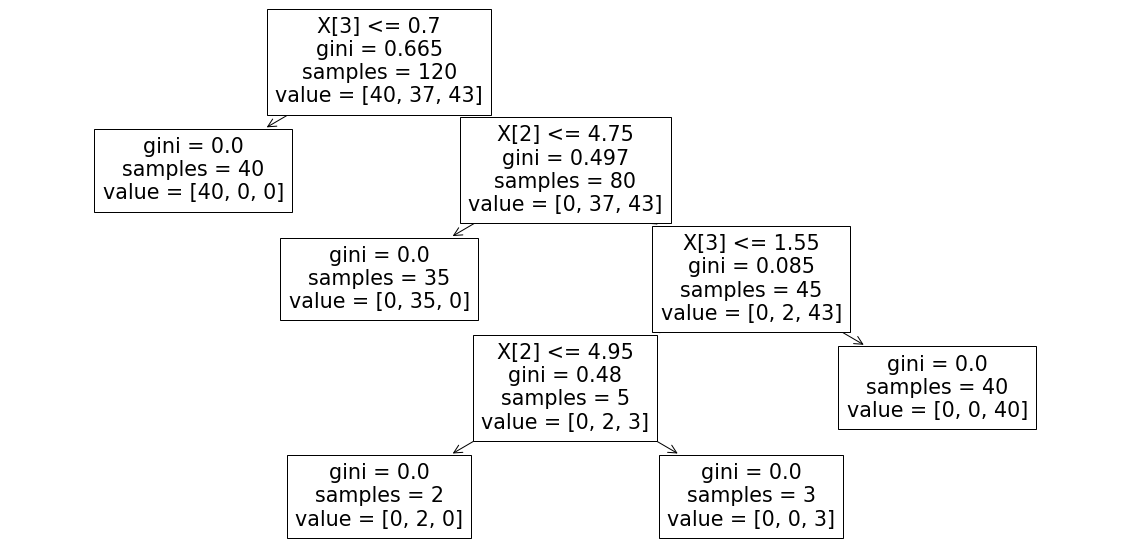

In [231]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

plot_tree(clf)

###Text representation

In [232]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_3 <= 0.70
|   |--- class: 0
|--- feature_3 >  0.70
|   |--- feature_2 <= 4.75
|   |   |--- class: 1
|   |--- feature_2 >  4.75
|   |   |--- feature_3 <= 1.55
|   |   |   |--- feature_2 <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  4.95
|   |   |   |   |--- class: 2
|   |   |--- feature_3 >  1.55
|   |   |   |--- class: 2



In [235]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0 10  3]
 [ 0  1  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      0.77      0.83        13
           2       0.67      0.86      0.75         7

    accuracy                           0.87        30
   macro avg       0.86      0.88      0.86        30
weighted avg       0.88      0.87      0.87        30

